## Machine Learning - Lab 02 - Logistic Regression 
* Full name: Đinh Anh Huy
* Student ID: 18110103

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
class Linear_Regression:
  def __init__(self, learning_rate=0.01, max_iters=1000, random_state=0, batch_size=None):
    self.W = None
    self.batch_size = batch_size
    self.random_state = random_state
    self.lr = learning_rate
    self.max_iters = max_iters
    self.loss_values = []
    self.weights = []

  def init_W(self, X):
    np.random.seed(self.random_state)
    self.W = np.random.randn(X.shape[1]+1,1)

  def BGD(self, X, y):
    for i in range(self.max_iters):
      prediction = np.matmul(X,self.W)
      loss = prediction - y
      gradient = np.matmul(X.T, loss)
      self.W = self.W - self.lr*(1/X.shape[0])*gradient
      self.weights.append(self.W)
      self.loss_values.append(0.5*np.mean(np.square(loss)))

  def SGD(self, X, y):
    for i in range(self.max_iters//X.shape[0]):
      rd_id = np.random.permutation(X.shape[0])
      for j in rd_id:
        X_1 = X[j,:].reshape(1,-1)
        prediction = np.matmul(X_1,self.W)
        error = prediction - y[j,:].reshape(1,-1)
        gradient = np.matmul(X_1.T, error)
        self.W = self.W - self.lr*gradient
      self.weights.append(self.W)  
      self.loss_values.append(0.5*np.mean(np.square(np.matmul(X, self.W) - y)))

  def Mini_BGD(self, X, y, batch_size):
    first_X = X.copy()
    first_y = y.copy()
    for i in range(self.max_iters//(X.shape[0]//self.batch_size + 1)):
      indices = np.random.permutation(X.shape[0])
      first_X = first_X[indices]
      first_y = first_y[indices]

      temp = batch_size
      # no_batchs = 0
      for j in range(0, X.shape[0], batch_size):
        # no_batchs += 1
        X_1 = first_X[j:temp, :]
        prediction = np.matmul(X_1,self.W)
        loss = prediction - first_y[j:temp,:]
        gradient = np.matmul(X_1.T,loss)
        self.W = self.W - self.lr*(1/X_1.shape[0])*gradient

        temp = temp + batch_size if X.shape[0]-temp >= batch_size else X.shape[0]

      self.weights.append(self.W)
      self.loss_values.append(0.5*np.mean(np.square(np.matmul(X,self.W)-y)))
    
  def fit(self, X, y):
    self.loss_values.clear()
    self.init_W(X)
    X1 = np.concatenate([np.ones([X.shape[0],1]), X], axis=1)

    if (self.batch_size == None) or (self.batch_size == X.shape[0]):
      self.BGD(X1, y)
    elif (self.batch_size > 1) and (self.batch_size < X.shape[0]):
      self.Mini_BGD(X1, y, self.batch_size)
    elif self.batch_size == 1:
      self.SGD(X1, y)
    else:
      raise Exception("Batch size is impossible.")

  def get_W(self):
    return self.W

  def predict(self, X):
    X1 = np.concatenate([np.ones([X.shape[0],1]), X], axis=1)
    return np.matmul(X1, self.W)

  def coef_(self):
    return self.W[1:,:]

  def intercept_(self):
    return self.W[1,:]

  def score(self):
    return self.loss_values[-1]


In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-02/Fish.csv")
data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


### Bài tập 1. Dùng 2 thuật toán Gradient Descent còn lại để tìm bộ Weight theo *Heigh* trong data fish.

In [4]:
X1_train, X1_test, y_train, y_test = train_test_split(data.loc[:,["Height"]].values, data.loc[:,"Weight"].values, test_size=0.2,random_state=1)
y_train = y_train.reshape(-1,1)

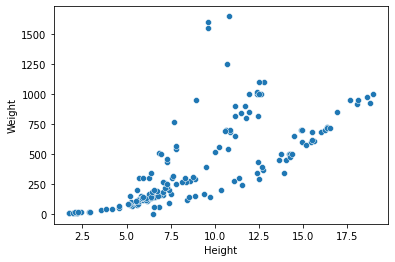

In [5]:
sns.scatterplot(x="Height",y="Weight",data=data)

#### Batch Gradient Descent

In [6]:
lr_bgd = Linear_Regression(learning_rate=0.01, max_iters=5000)
lr_bgd.fit(X1_train, y_train)
for i in range(0, len(lr_bgd.loss_values), 1000):
  print("Loss at iter {}: {}".format(i, lr_bgd.loss_values[i]))
print("\n", "-"*40, "\n")
print(">> Final loss: ", lr_bgd.loss_values[-1])
print(">> Final W: \n", lr_bgd.W)

Loss at iter 0: 143629.41496723678
Loss at iter 1000: 30852.78316027092
Loss at iter 2000: 30806.287932573283
Loss at iter 3000: 30804.937752534483
Loss at iter 4000: 30804.898544507603

 ---------------------------------------- 

>> Final loss:  30804.89740606212
>> Final W: 
 [[-130.00451345]
 [  59.42718046]]


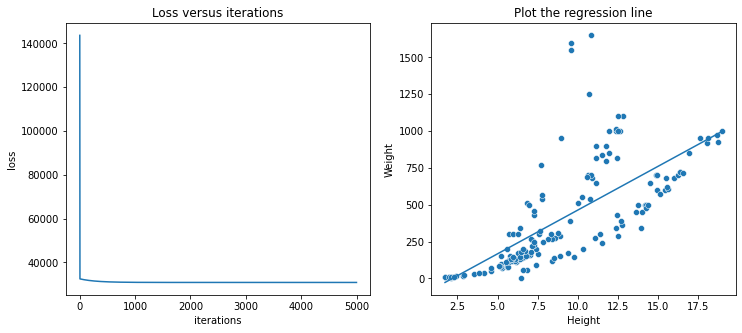

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(lr_bgd.loss_values)
ax[0].set_title('Loss versus iterations')
ax[0].set(xlabel='iterations', ylabel='loss')

ax[1] = sns.scatterplot(x="Height", y="Weight", data=data)
ax[1] = sns.lineplot(x=data.loc[:,"Height"].values, y=lr_bgd.predict(data[['Height']]).reshape(-1,))
ax[1].set_title('Plot the regression line')

plt.show()

### Stochastic Gradient Descent

In [8]:
lr_sgd = Linear_Regression(learning_rate=0.0000761, max_iters=1905000, batch_size=1)
lr_sgd.fit(X1_train, y_train)
for i in range(0, len(lr_sgd.loss_values), 1000):
  print("Loss at iter {}: {}".format(i, lr_sgd.loss_values[i]))
print("\n", "-"*40, "\n")
print(">> Final loss: ", lr_sgd.loss_values[-1])
print(">> Final W: \n", lr_sgd.W)

Loss at iter 0: 48462.08453738211
Loss at iter 1000: 30859.313577196408
Loss at iter 2000: 30810.562392453307
Loss at iter 3000: 30818.413253952494
Loss at iter 4000: 30834.170396913873
Loss at iter 5000: 30807.09930476146
Loss at iter 6000: 30816.914514820164
Loss at iter 7000: 30823.279997203277
Loss at iter 8000: 30805.671445248867
Loss at iter 9000: 30804.958571819374
Loss at iter 10000: 30808.096965476663
Loss at iter 11000: 30828.62550916856
Loss at iter 12000: 30806.894593637593
Loss at iter 13000: 30813.687337580333
Loss at iter 14000: 30814.97593333757

 ---------------------------------------- 

>> Final loss:  30804.90300552718
>> Final W: 
 [[-129.77306661]
 [  59.40685107]]


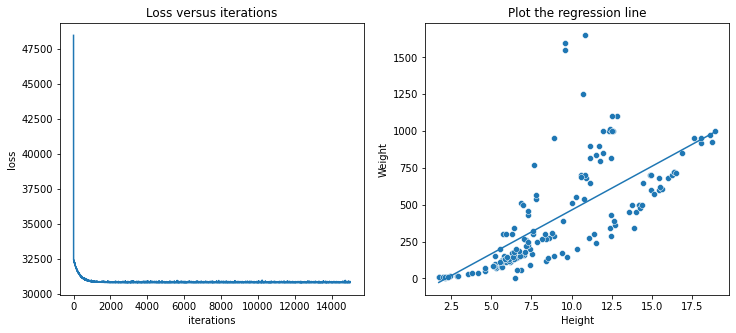

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(lr_sgd.loss_values)
ax[0].set_title('Loss versus iterations')
ax[0].set(xlabel='iterations', ylabel='loss')

ax[1] = sns.scatterplot(x="Height", y="Weight", data=data)
ax[1] = sns.lineplot(x=data.loc[:,"Height"].values, y=lr_sgd.predict(data[['Height']]).reshape(-1,))
ax[1].set_title('Plot the regression line')

plt.show()

### Mini-Batch Gradient Descent

In [10]:
lr_mini = Linear_Regression(learning_rate=0.001, max_iters=45000, batch_size=51)
lr_mini.fit(X1_train, y_train)
for i in range(0, len(lr_mini.loss_values), 1000):
  print("Loss at iter {}: {}".format(i, lr_mini.loss_values[i]))
print("\n", "-"*40, "\n")
print(">> Final loss: ", lr_mini.loss_values[-1])
print(">> Final W: ", lr_mini.W)

Loss at iter 0: 92296.3033711599
Loss at iter 1000: 31378.897843301253
Loss at iter 2000: 31011.839010964177
Loss at iter 3000: 30895.414433453545
Loss at iter 4000: 30843.719103789237
Loss at iter 5000: 30814.440955637325
Loss at iter 6000: 30808.365953770455
Loss at iter 7000: 30847.4957362893
Loss at iter 8000: 30806.824056685888
Loss at iter 9000: 30809.274001912094
Loss at iter 10000: 30805.30201468106
Loss at iter 11000: 30804.943529120646
Loss at iter 12000: 30804.91495176974
Loss at iter 13000: 30811.68956828631
Loss at iter 14000: 30805.455309700566

 ---------------------------------------- 

>> Final loss:  30804.898660196588
>> Final W:  [[-129.95231874]
 [  59.42652647]]


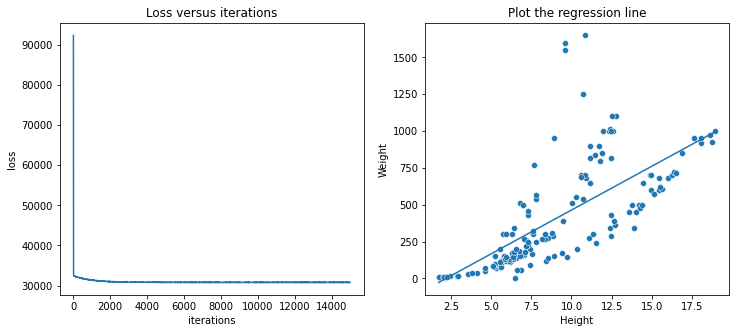

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(lr_mini.loss_values)
ax[0].set_title('Loss versus iterations')
ax[0].set(xlabel='iterations', ylabel='loss')

ax[1] = sns.scatterplot(x="Height", y="Weight", data=data)
ax[1] = sns.lineplot(x=data.loc[:,"Height"].values, y=lr_mini.predict(data[['Height']]).reshape(-1,))
ax[1].set_title('Plot the regression line')

plt.show()

#### Kết quả của bài toán Linear Regression với data fish chạy bằng thư viện scikit-learn.

In [12]:
lr = LinearRegression()
lr.fit(X1_train, y_train)

print(">> Matrix W except bias: \n", lr.coef_)
print("\n>> Bias: ", lr.intercept_)

y_pred = lr.predict(X1_test)

from sklearn.metrics import mean_squared_error

# Calculation of Mean Squared Error (MSE)
MSE = mean_squared_error(y_test, y_pred)
print("\n>> Loss value of model: ", MSE*0.5)

>> Matrix W except bias: 
 [[59.42895267]]

>> Bias:  [-130.02405987]

>> Loss value of model:  28228.21519710936


## Bài tập 2. Dùng 3 thuật toán Gradient Descent đã học để tìm bộ Weight theo *Height* và *Width* trong data fish.

In [13]:
X2_train, X2_test, y_train, y_test = train_test_split(data.loc[:,["Height", "Width"]].values, data.loc[:,"Weight"].values, test_size=0.2,random_state=1)
y_train = y_train.reshape(-1,1)

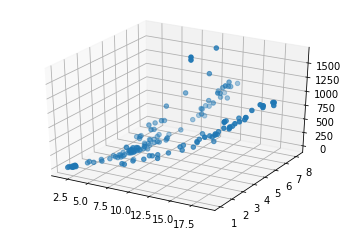

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data['Height'], data['Width'], data['Weight'])
plt.show()

In [15]:
learning_rate = 0.01
max_iters = 127000

#### Batch Gradient Descent

In [16]:
lr_bgd = Linear_Regression(learning_rate=learning_rate, max_iters=max_iters)
lr_bgd.fit(X2_train, y_train)
for i in range(0, len(lr_bgd.loss_values), 1000):
  print("Loss at iter {}: {}".format(i, lr_bgd.loss_values[i]))
print("\n", "-"*40, "\n")
print(">> Final loss: ", lr_bgd.loss_values[-1])
print(">> Final W: \n", lr_bgd.W)

Loss at iter 0: 141342.73193109303
Loss at iter 1000: 13213.782398405527
Loss at iter 2000: 12277.119091226865
Loss at iter 3000: 12198.713544446102
Loss at iter 4000: 12192.150428629615
Loss at iter 5000: 12191.601047992795
Loss at iter 6000: 12191.555060828689
Loss at iter 7000: 12191.551211367821
Loss at iter 8000: 12191.550889139886
Loss at iter 9000: 12191.550862167058
Loss at iter 10000: 12191.550859909235
Loss at iter 11000: 12191.55085972024
Loss at iter 12000: 12191.55085970442
Loss at iter 13000: 12191.550859703093
Loss at iter 14000: 12191.550859702984
Loss at iter 15000: 12191.550859702973
Loss at iter 16000: 12191.550859702975
Loss at iter 17000: 12191.550859702977
Loss at iter 18000: 12191.550859702973
Loss at iter 19000: 12191.550859702971
Loss at iter 20000: 12191.550859702975
Loss at iter 21000: 12191.550859702977
Loss at iter 22000: 12191.550859702973
Loss at iter 23000: 12191.550859702973
Loss at iter 24000: 12191.550859702971
Loss at iter 25000: 12191.550859702975
L

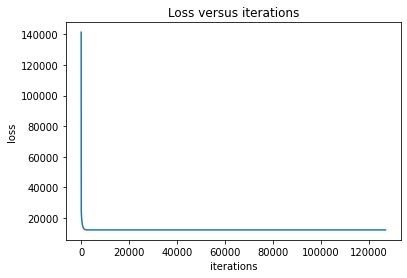

In [17]:
fig, ax = plt.subplots()

ax.plot(lr_bgd.loss_values)
ax.set_title('Loss versus iterations')
ax.set(xlabel='iterations', ylabel='loss')

plt.show()

#### Stochastic Gradient Descent

In [18]:
lr_sgd = Linear_Regression(learning_rate=learning_rate, max_iters=max_iters, batch_size=1)
lr_sgd.fit(X2_train, y_train)
for i in range(0, len(lr_sgd.loss_values), 1000):
  print("Loss at iter {}: {}".format(i, lr_sgd.loss_values[i]))
print("\n", "-"*40, "\n")
print(">> Final loss: ", lr_sgd.loss_values[-1])
print(">> Final W: \n", lr_sgd.W)

Loss at iter 0: 22443.70472077978

 ---------------------------------------- 

>> Final loss:  25693.843496116184
>> Final W: 
 [[-371.72868457]
 [  14.22725771]
 [ 180.79292337]]


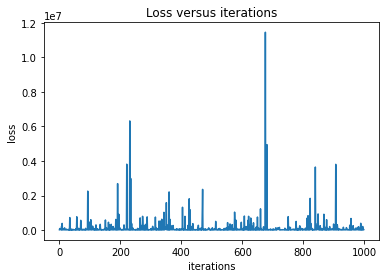

In [19]:
fig, ax = plt.subplots()

ax.plot(lr_sgd.loss_values)
ax.set_title('Loss versus iterations')
ax.set(xlabel='iterations', ylabel='loss')

plt.show()

#### Mini-Batch Gradient Descent

In [20]:
lr_mini = Linear_Regression(learning_rate=learning_rate, max_iters=max_iters, batch_size=32)
lr_mini.fit(X2_train, y_train)
for i in range(0, len(lr_mini.loss_values), 1000):
  print("Loss at iter {}: {}".format(i, lr_mini.loss_values[i]))
print("\n", "-"*40, "\n")
print(">> Final loss: ", lr_mini.loss_values[-1])
print(">> Final W: \n", lr_mini.W)

Loss at iter 0: 32510.67148351419
Loss at iter 1000: 14035.012481953225
Loss at iter 2000: 13204.746490680996
Loss at iter 3000: 12313.505437450942
Loss at iter 4000: 12450.45945852812
Loss at iter 5000: 12656.914648726082
Loss at iter 6000: 12305.536236598422
Loss at iter 7000: 12323.895836550046
Loss at iter 8000: 12442.38106055008
Loss at iter 9000: 12198.564485784887
Loss at iter 10000: 12194.21656641432
Loss at iter 11000: 12379.237210214778
Loss at iter 12000: 12283.84547902514
Loss at iter 13000: 12587.12053586658
Loss at iter 14000: 12331.989912139647
Loss at iter 15000: 12515.83589825645
Loss at iter 16000: 12374.129362770207
Loss at iter 17000: 12198.11470104707
Loss at iter 18000: 12925.661395282565
Loss at iter 19000: 12378.5548097226
Loss at iter 20000: 12294.131417468221
Loss at iter 21000: 12626.594432012793
Loss at iter 22000: 12929.94561037944
Loss at iter 23000: 12192.922043587052
Loss at iter 24000: 12228.4890290832
Loss at iter 25000: 12220.450041982678
Loss at iter

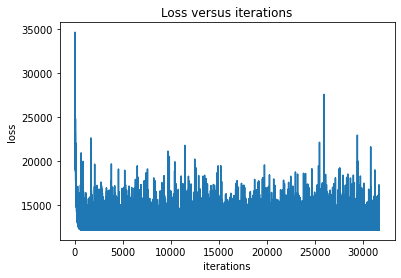

In [21]:
fig, ax = plt.subplots()

ax.plot(lr_mini.loss_values)
ax.set_title('Loss versus iterations')
ax.set(xlabel='iterations', ylabel='loss')

plt.show()

#### Kết quả của bài toán Linear Regression với data fish chạy bằng thư viện scikit-learn.

In [22]:
lr = LinearRegression()
lr.fit(X2_train, y_train)

print(">> Matrix W except bias: \n", lr.coef_)
print("\n>> Bias: ", lr.intercept_)

y_pred = lr.predict(X2_test)

from sklearn.metrics import mean_squared_error

# Calculation of Mean Squared Error (MSE)
MSE = mean_squared_error(y_test, y_pred)
print("\n>> Loss value of model: ", MSE*0.5)

>> Matrix W except bias: 
 [[  1.63051922 181.33412414]]

>> Bias:  [-415.4812046]

>> Loss value of model:  19231.487048543


## Bài tập 3. Cho biết Weights tốt nhất cho các mô hình trên (cho câu 2 cả 3 thuật toán).

In [23]:
algs = [lr_bgd, lr_sgd, lr_mini]
y_preds = np.array([alg.predict(X2_test) for alg in algs])
y_test = y_test.reshape(1,-1).T

loss = {}
loss['loss_train_set'] = [alg.loss_values[-1] for alg in algs]
loss['loss_test_set'] = [0.5*np.mean(np.square(y-y_test)) for y in y_preds]
loss = pd.DataFrame(loss)
loss.index = ['BGD', 'SGD', 'Mini-BGD']
loss

,loss_train_set,loss_test_set
BGD,12191.550860,19231.487049
SGD,25693.843496,30657.726522
Mini-BGD,12719.937354,20057.215961


In [24]:
best_idx = np.where(loss == loss.min()['loss_test_set'])[0][0]
print("The best weights for above model on {}: \n{}\nwith loss {}".format(loss.index[best_idx], algs[best_idx].W, loss['loss_test_set'][best_idx]))

The best weights for above model on BGD: 
[[-415.4812046 ]
 [   1.63051922]
 [ 181.33412414]]
with loss 19231.48704854324
